# AirBnB NY Locations Data Case Study

In this final project, you task will be to take the data provided and find evidence to answer the following questions.

1. How many neighborhood groups are there and which shows up the most?
2. Are private rooms the most popular in Manhattan?
3. Who are the top 10 busiest hosts based on number of reviews per month?
4. Which neighorhood group has the highest average price? Plot the average prices in a professional looking bar chart
5. What is the most expensive neighbourhood in each neighbourhood group?
6. Which host has the highest minimum rental? *minimal rental is based on price and minimum nights
7. Who currently has no (zero) availability with a review count of 100 or more?
8. If each host rents all of their properties for the night, which 5 make the most that night?
9. When did Danielle from Queens last receive a review?
10. Display a bar chart showing the number of each type of room in the Bronx

You will be given **4 hours** to complete this assignment. 
**Be Advised** I will go dark for this entire assignment time period. That said, any questions that you would like to ask about the data, or the project **MUST** be asked before the time starts. Once the time has started, I can no longer give information.

This is to simulate what you will face when you are out in the wild. 

Happy Coding!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [186]:
air_bnb = pd.read_csv('./AB_NYC_2019.csv')
air_bnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48043,36056808,Luxury TriBeCa Apartment at an amazing price,271248669,Jenny,Manhattan,Tribeca,40.71206,-74.00999,Entire home/apt,6500,180,0,NaN,NaN,1,365


In [25]:
# How many neighbourhood groups / which shows up the most
neighborhood_groups = air_bnb.groupby('neighbourhood_group').count()[['id']].sort_values('id', ascending=False)
neighborhood_groups['index'] = range(1, len(neighborhood_groups)+1)
neighborhood_groups

# There are 5 neighborhood groups, with the most common being Manhattan

,id,index
neighbourhood_group,,
Manhattan,21661,1
Brooklyn,20104,2
Queens,5666,3
Bronx,1091,4
Staten Island,373,5


In [88]:
# Are private rooms the most popular in Manhattan?
manhattan_room_types = air_bnb[air_bnb['neighbourhood_group'] == 'Manhattan']
manhattan_room_types.groupby('room_type').mean()[['availability_365']].sort_values('availability_365')

# Yes

,availability_365
room_type,
Private room,101.845026
Entire home/apt,117.140996
Shared room,138.572917


In [173]:
# Who are the top 10 busiest hosts based on number of reviews per month?
air_bnb.groupby('host_id').sum()[['reviews_per_month']].sort_values('reviews_per_month', ascending=False).head(10)


,reviews_per_month
host_id,
219517861,397.56
244361589,111.72
232251881,80.63
26432133,68.02
137274917,62.89
224414117,59.10
156948703,56.44
344035,56.00
156684502,54.38


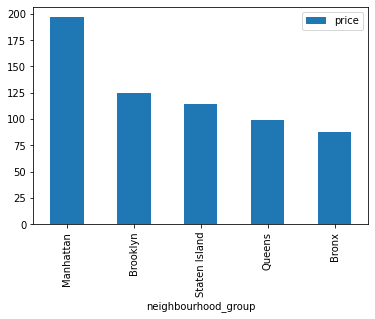

In [159]:
# Which neighborhood group has the highest avg price and plot the average prices in a bar chart

highest_avg_prices = air_bnb.groupby('neighbourhood_group').mean()[['price']].sort_values('price', ascending=False).round(2)
highest_avg_prices.plot(kind='bar')
plt.show()

In [176]:
# What is the most expensive neighbourhood in each neighbourhood_group
manhattan = air_bnb[air_bnb['neighbourhood_group'] == "Manhattan"] 
brooklyn = air_bnb[air_bnb['neighbourhood_group'] == "Brooklyn"]
staten_island = air_bnb[air_bnb['neighbourhood_group'] == "Staten Island"]
queens = air_bnb[air_bnb['neighbourhood_group'] == "Queens"]
bronx = air_bnb[air_bnb['neighbourhood_group'] == "Bronx"]

manhattan.groupby('neighbourhood').mean()[['price']].sort_values('price', ascending=False).round(2).head(1)

,price
neighbourhood,
Tribeca,490.64


In [178]:
brooklyn.groupby('neighbourhood').mean()[['price']].sort_values('price', ascending=False).round(2).head(1)

,price
neighbourhood,
Sea Gate,487.86


In [179]:
staten_island.groupby('neighbourhood').mean()[['price']].sort_values('price', ascending=False).round(2).head(1)

,price
neighbourhood,
Fort Wadsworth,800.0


In [180]:
queens.groupby('neighbourhood').mean()[['price']].sort_values('price', ascending=False).round(2).head(1)

,price
neighbourhood,
Neponsit,274.67


In [183]:
bronx.groupby('neighbourhood').mean()[['price']].sort_values('price', ascending=False).round(2).head(1)

,price
neighbourhood,
Riverdale,442.09


In [191]:
# Which host has the highest minimum rental? *minimal rental is based on price and minimum nights
air_bnb['min_cost'] = air_bnb['price'] * air_bnb['minimum_nights']
air_bnb.groupby('host_id').max()[['min_cost']].sort_values('min_cost', ascending=False).round(2).head(1)

C:\Users\jendu\AppData\Local\Temp/ipykernel_20004/380935852.py:3: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  air_bnb.groupby('host_id').max()[['min_cost']].sort_values('min_cost', ascending=False).round(2).head(1)


,min_cost
host_id,
271248669,1170000


In [119]:
# Who has no (zero) availability with a review count of 100 or more
num_reviews_100_and_over = air_bnb[air_bnb['number_of_reviews'] >=100]
num_reviews_100_and_over[num_reviews_100_and_over['availability_365'] == 0]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhod_group,min_cost
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0,Manhattan,158
94,20913,Charming 1 bed GR8 WBurg LOCATION!,79402,Christiana,Brooklyn,Williamsburg,40.70984,-73.95775,Entire home/apt,100,5,168,2018-07-22,1.57,1,0,Manhattan,500
132,30031,NYC artists’ loft with roof deck,129352,Sol,Brooklyn,Greenpoint,40.73494,-73.95030,Private room,50,3,193,2019-05-20,1.86,1,0,Manhattan,150
174,44221,Financial District Luxury Loft,193722,Coral,Manhattan,Financial District,40.70666,-74.01374,Entire home/apt,196,3,114,2019-06-20,1.06,1,0,Manhattan,588
180,45556,"Fort Greene, Brooklyn: Center Bedroom",67778,Doug,Brooklyn,Fort Greene,40.68863,-73.97691,Private room,65,2,206,2019-06-30,1.92,2,0,Manhattan,130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29581,22705516,The Quietest Block in Manhattan :),127740507,Kathleen,Manhattan,Harlem,40.83102,-73.94181,Private room,65,2,103,2019-07-07,5.89,2,0,Manhattan,130
30461,23574142,queens get away!!,176185168,Janet,Queens,Laurelton,40.68209,-73.73662,Private room,65,1,119,2018-12-24,7.79,1,0,Manhattan,65
31250,24267706,entire sunshine of the spotless mind room,21074914,Albert,Brooklyn,Bedford-Stuyvesant,40.68234,-73.91318,Private room,49,1,102,2019-07-05,6.73,3,0,Manhattan,49
32670,25719044,COZY Room for Female Guests,40119874,Stephany,Brooklyn,Prospect-Lefferts Gardens,40.66242,-73.94417,Private room,48,1,131,2019-05-31,9.97,2,0,Manhattan,48


In [127]:
# If each host rents all of their properties for the night, which 5 make the most that night?
air_bnb.groupby('host_name').sum()[['min_cost']].sort_values('min_cost', ascending = False).head(5)



,min_cost
host_name,
Blueground,2258580
Jenny,1215111
Kara,1172637
Amy,1153867
Kathrine,1002082


In [195]:
# When did Danielle from Queens last receive a review?
danielle_from_queens = air_bnb[(air_bnb['host_name'] == 'Danielle') & (air_bnb['neighbourhood_group'] == 'Queens')][['last_review']].sort_values('last_review', ascending=False)
danielle_from_queens

,last_review
22469,2019-07-08
21517,2019-07-07
20403,2019-07-06
22068,2019-07-06
7086,2019-07-03
33861,2019-06-20
27021,2018-01-02
16349,NaN


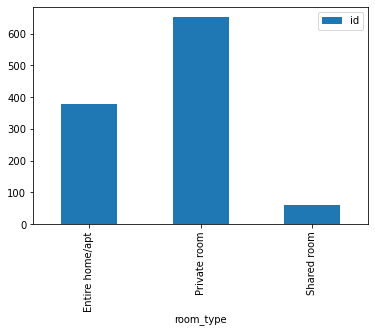

In [155]:
# bar chart showing the number of room types in the Bronx
bronx_room_types = air_bnb[air_bnb['neighbourhood_group']=='Bronx'].groupby('room_type').count()[['id']]
bronx_room_types
bronx_room_types.plot(kind='bar')
plt.show()

# Final Conclusion

In this cell, write your final conclusion for each of the questions asked.

Also, if you uncovered some more details that were not asked above, please discribe them here.

-- Add your conclusion --

In [ ]:
# There are 5 neighborhood groups, with the most common being Manhattan
# Private rooms are the most popular in Manhattan
# Host with ID 219517861 recieves the most reviews per month
# Manhattan has the highest average prices, and Bronx has the lowest
# The most expensive neigborhood in Manhatten is Tribeca, Brooklyn is Sea Gate, Staten Island is Fort Wadsworth, Queens is Neponsit, Bronx is Riverdale
# Host with ID 271248669 has the most expensive minimum cost at $1.17 million
# There are 162 air_bnbs with over 100 reviews and zero availability
# If each host rents all their properties for the night, Blueground, Jenny, Kara, Amy, Kathrine would make the most money
# There are 8 Danielles from Queens with last review dates ranging from as early as July 8, 2019, to as late as January 2, 2018, and 1 without any review
# There are approx 6x more private rooms(over 600) than shared rooms(less than 100) in the Bronx. The number of of entire homes falls inbetween those two numbers, having almost almost 400.